In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
housing_raw = pd.read_csv("D:/STUDIES/Data Visualization/Data/housing_data.csv", 
                          parse_dates=['period_begin', 'period_end'], 
                          dtype={'total_homes_sold':'Int32', 'region_name': 'category'})

In [5]:
bins = np.linspace(0, 1750000, 8)

labels = ["0-250k", "250k-500k", "500k-750k", "750k-1m", "1m-1.25m", "1.25m-1.5m", "1.5m+"]

In [7]:
ca_housing = (housing_raw.loc[housing_raw['region_name'].str.contains("CA")]\
            .assign(region_name = housing_raw['region_name'].str[0:-11], price_bins = pd.cut(
                housing_raw["median_active_list_price"],
                bins = bins,
                labels = labels
                )
                   
            )
             )
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,250k-500k
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607,500k-750k
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632,250k-500k
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228,250k-500k
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362,250k-500k


In [8]:
country_list = ["Los Angeles", "San Diego", "San Francisco", "Tulare"]

ca_housing = ca_housing.loc[ca_housing["region_name"].isin(country_list)]

ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
883,Tulare,2019-07-08,2019-09-29,998,94.0,101.0,51.5,275036.4,1.247401,250k-500k
889,Los Angeles,2018-08-20,2018-11-11,16015,20026.0,21675.0,51.9,694662.5,16.528985,500k-750k
2365,Tulare,2022-02-14,2022-05-08,1029,320.0,367.0,28.7,382726.4,4.220507,250k-500k
3773,Los Angeles,2017-12-25,2018-03-18,13596,13817.0,15251.0,51.3,664516.6,13.834214,500k-750k
3802,Tulare,2021-10-11,2022-01-02,952,83.0,90.0,50.5,358812.5,1.160690,250k-500k


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

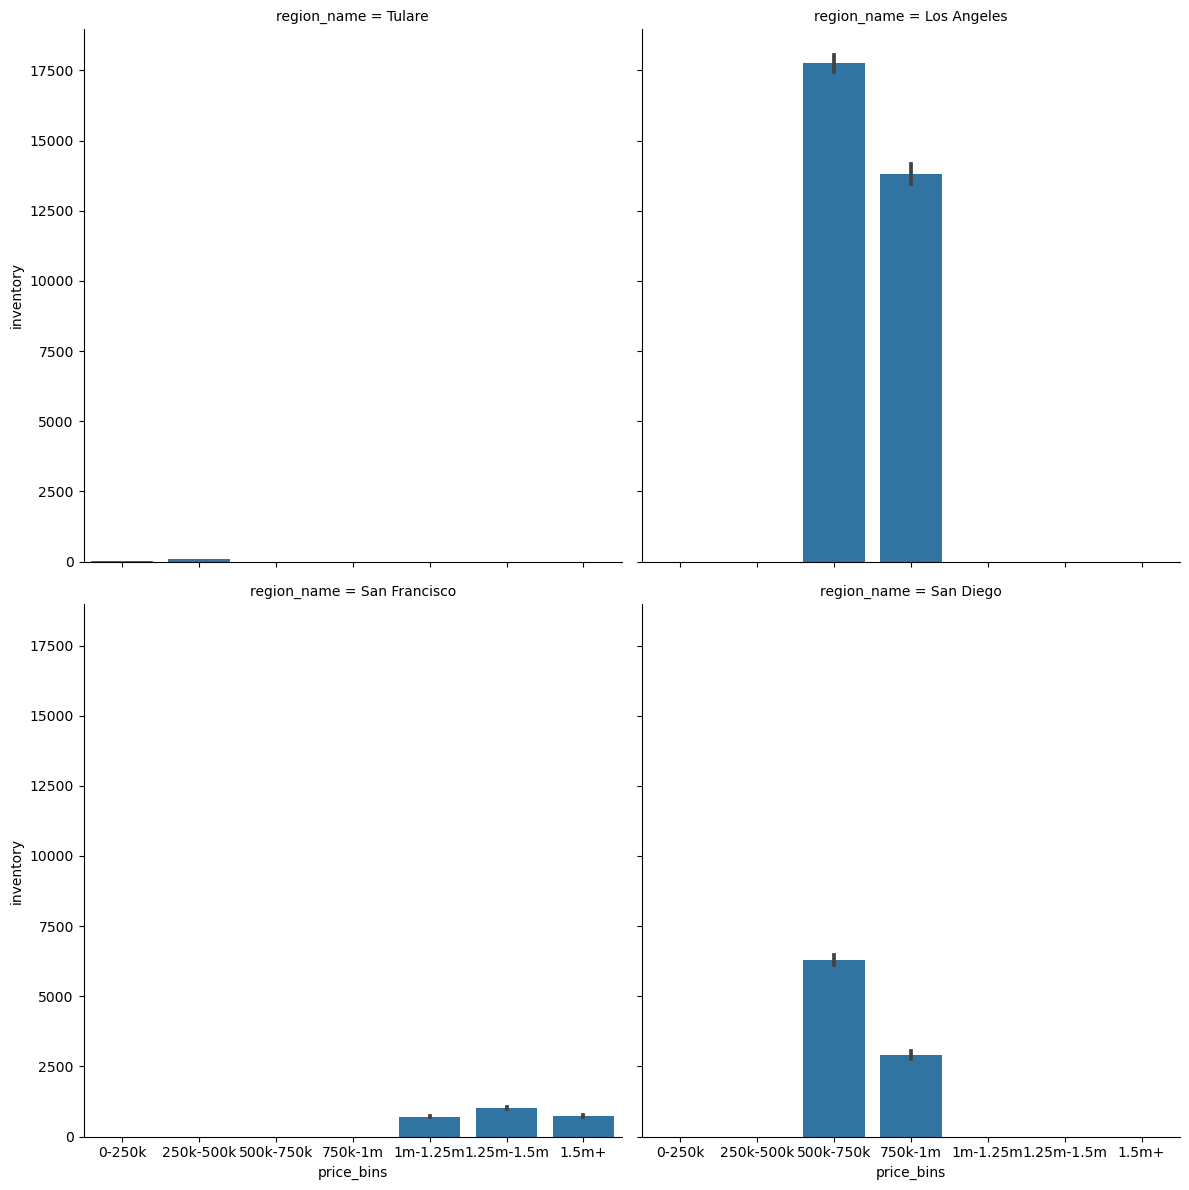

In [13]:
g = sns.FacetGrid(
    ca_housing,
    col="region_name",
    col_wrap=2,
    height=6
)

g.map_dataframe(sns.barplot, x = "price_bins", y="inventory")

# Matplotlib Integration

In [14]:
diamonds = pd.read_csv("D:/STUDIES/Data Visualization/Data/Diamonds Prices2022.csv")

Text(0, 0.5, 'Carat Weight')

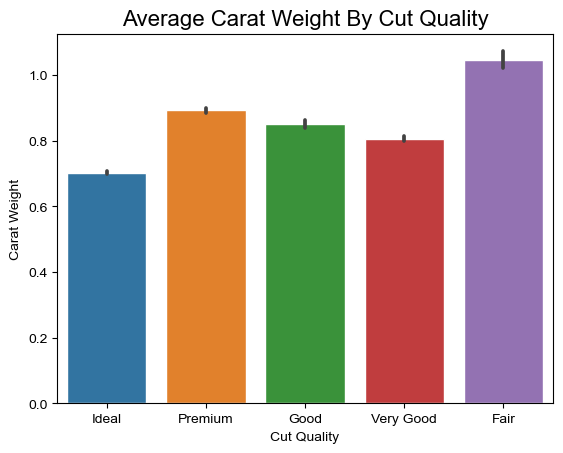

In [15]:
fig, ax = plt.subplots()

sns.set_style("darkgrid")

sns.barplot(
    x = "cut",
    y = "carat",
    data = diamonds
)

ax.set_title("Average Carat Weight By Cut Quality", fontsize = 16)
ax.set_xlabel("Cut Quality")
ax.set_ylabel("Carat Weight")

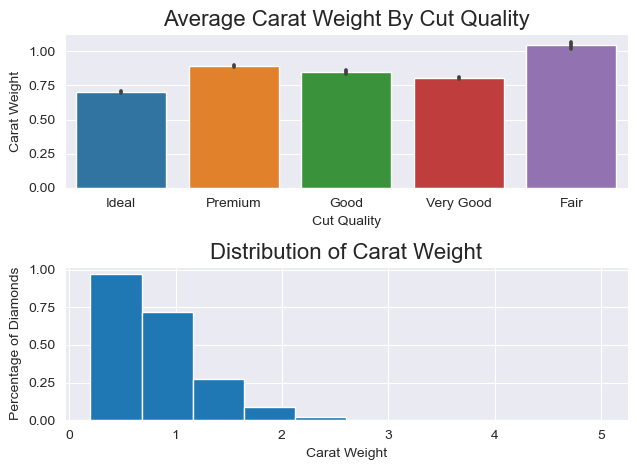

In [20]:
fig, ax = plt.subplots(2, 1)

sns.set_style("darkgrid")

sns.barplot(
    x = "cut",
    y = "carat",
    data = diamonds,
    ax = ax[0]
)

ax[0].set_title("Average Carat Weight By Cut Quality", fontsize = 16)
ax[0].set_xlabel("Cut Quality")
ax[0].set_ylabel("Carat Weight")

ax[1].hist(diamonds["carat"], density = True)
ax[1].set_title("Distribution of Carat Weight", fontsize = 16)
ax[1].set_ylabel("Percentage of Diamonds")
ax[1].set_xlabel("Carat Weight")

fig.tight_layout()